## 箱线图检测异常值方法和原理

### 箱线图

> 箱线图（Boxplot）也称箱须图（Box-whisker Plot），是利用数据中的五个统计量：最小值、第一四分位数、中位数、第三四分位数与最大值来描述数据的一种方法，它也可以粗略地看出数据是否具有有对称性，分布的分散程度等信息，特别可以用于对几个样本的比较。 ——[MBAlib 箱线图](http://wiki.mbalib.com/wiki/%E7%AE%B1%E7%BA%BF%E5%9B%BE)

先看一下什么是箱线图，下面这个是常见的箱线图样子。

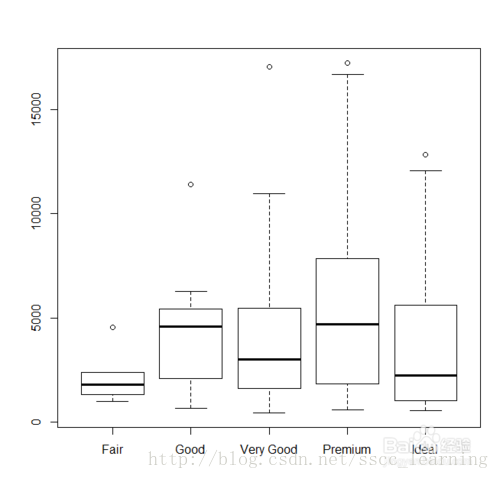

具体含义如下，首先计算出 **第一四分位数（Q1）、中位数、第三四分位数（Q3）**。 

中位数我们都知道，就是将一组数字按从小到大的顺序排序后，处于中间位置（也就是50%位置）的数字。 

同理，第一四分位数、第三四分位数是按从小到大的顺序排序后，处于25%、75%的数字。

令 $IQR = Q3 − Q1$ ，那么 $Q3 + 1.5(IQR)$ 和 $Q1 − 1.5(IQR)$ 之间的值就是可接受范围内的数值，这两个值之外的数认为是异常值。

在 $Q3 ＋ 1.5(IQR)$（四分位距）和 $Q1 - 1.5(IQR)$ 处画两条与中位线一样的线段，这两条线段为异常值截断点，称其为**内限**；在 $Q3 ＋ 3(IQR)$ 和 $Q1 － 3(IQR)$ 处画两条线段，称其为**外限**。 

**处于内限以外位置的点表示的数据都是异常值**，其中在内限与外限之间的异常值为温和的异常值（mild outliers），在外限以外的为极端的异常值(li)的异常值extreme outliers。这种异常值的检测方法叫做**Tukey’s method**。

从矩形盒两端边向外各画一条线段直到不是异常值的最远点 表示该批数据正常值的分布区间点，示该批数据正常值的分布区间。 

**一般用“〇”标出温和的异常值，用“＊”标出极端的异常值。**

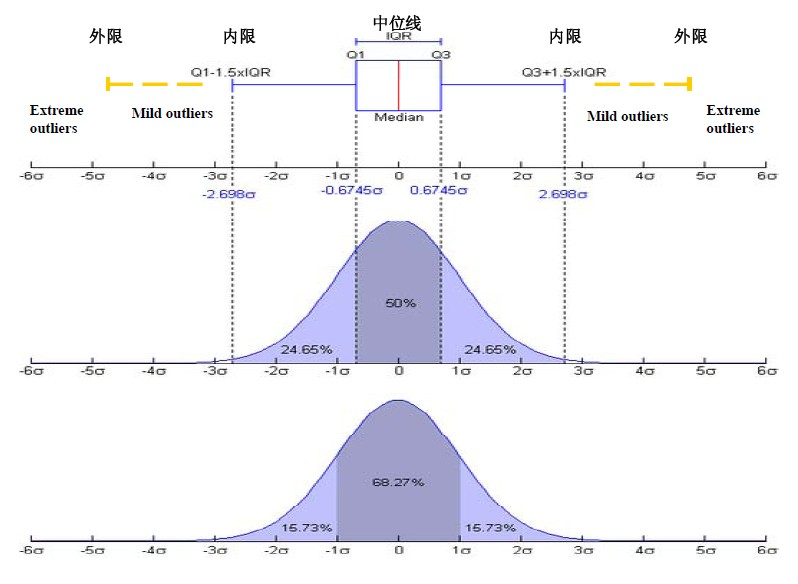

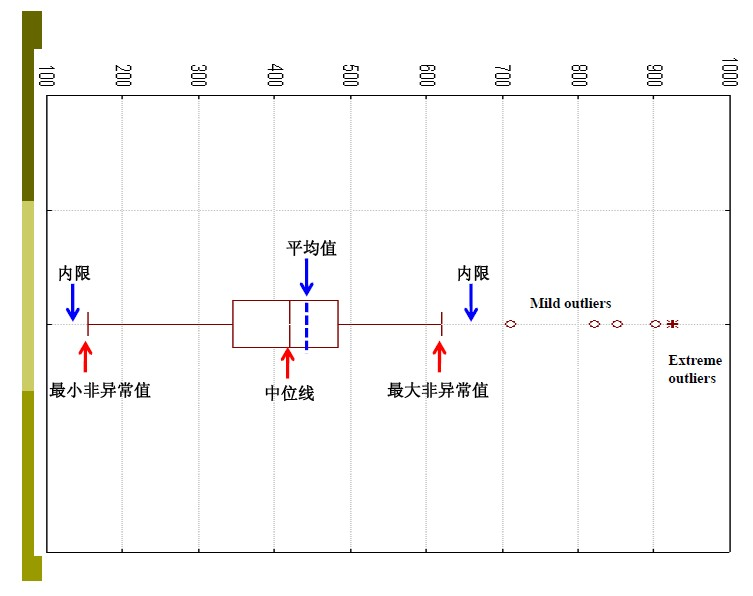

## Python 代码分享

> 这段检测异常值的代码是从kaggle上看到的，很简单也很有用。 

> 代码原地址：https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling/notebook

通过上面对箱线图的介绍，相信同时也清楚了异常值检测的方法。 

假设我们现在已经有了一份pandas.DataFrame读取后的数据df，其中需要进行检测的列保存在features列表中，每个样本能忍受的最大异常值数量为n。

In [1]:
# Outlier detection 
import pandas as pd
import numpy as np
from collections import Counter

def detect_outliers(df,n,features):

    outlier_indices = []

    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

    return multiple_outliers

In [3]:
# detect outliers from Age, SibSp , Parch and Fare
train = pd.read_csv("Titanic_data/train.csv")
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])
train.loc[Outliers_to_drop]

/home/miaopei/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [5]:
# Drop outliers
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

## Reference

[【代码分享】一种异常值检测方法、原理 （基于箱线图）](http://blog.csdn.net/sscc_learning/article/details/78771324)